# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, June 13, 2022 at 18:00**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


> If you get a `FutureWarning` regarding `pandas.Int64Index`, you can ignore it. It is because of a [known issue in `xgboost`](https://github.com/dmlc/xgboost/issues/7593).

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022s/blob/master/docs/homework_instructions.md).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.
- The maximum group size is 2.
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

In [2]:
UCI_credit = pd.read_csv("UCI_Credit_Card.csv", index_col=0)
UCI_credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
train_df, test_df = train_test_split(UCI_credit, test_size=0.4, random_state=1)
#using test_size=0.4 because question 10 was taking half an hour to run, so we made the decision to reduce the training data size. 

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
# summary statistics
train_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,167263.204444,1.603556,1.859833,1.550111,35.515111,-0.017833,-0.127833,-0.162500,-0.217667,-0.260389,...,43024.649167,39991.277056,38573.738944,5554.585111,5.905581e+03,5125.411000,4669.342500,4727.985278,5049.966889,0.219889
std,130036.822063,0.489172,0.793095,0.521487,9.189832,1.129763,1.203797,1.200304,1.173990,1.137733,...,64087.528136,60558.630546,59542.927990,15777.150860,2.145149e+04,16645.904524,14910.100485,15290.328304,16546.625595,0.414183
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2289.750000,1759.000000,1261.000000,979.750000,8.357500e+02,395.500000,291.000000,244.000000,136.500000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19080.000000,18087.000000,17023.000000,2100.000000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54332.250000,50011.500000,48972.750000,5006.000000,5.000000e+03,4429.500000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.227082e+06,896040.000000,528897.000000,426529.000000,443001.000000,1.000000


.describe() prints out a statistical summary of the columns, containing values such as mean, standard deviation, min and max values.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 27297 to 29734
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   18000 non-null  float64
 1   SEX                         18000 non-null  int64  
 2   EDUCATION                   18000 non-null  int64  
 3   MARRIAGE                    18000 non-null  int64  
 4   AGE                         18000 non-null  int64  
 5   PAY_0                       18000 non-null  int64  
 6   PAY_2                       18000 non-null  int64  
 7   PAY_3                       18000 non-null  int64  
 8   PAY_4                       18000 non-null  int64  
 9   PAY_5                       18000 non-null  int64  
 10  PAY_6                       18000 non-null  int64  
 11  BILL_AMT1                   18000 non-null  float64
 12  BILL_AMT2                   18000 non-null  float64
 13  BILL_AMT3                  

.info() prints out a brief summary of the dataset, including non-null count values, and data type of each column.

In [6]:
train_df["default.payment.next.month"].value_counts()

0    14042
1     3958
Name: default.payment.next.month, dtype: int64

using .value_counts() on the target columns allows examination of whether it is balanced or not, in this case, it is not. Out of all training data, only 22% is target = 1.

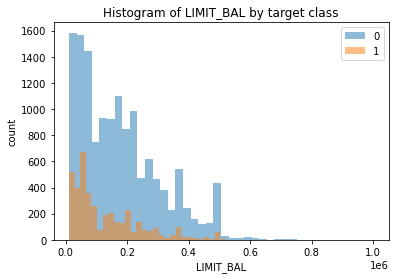

<Figure size 576x432 with 0 Axes>

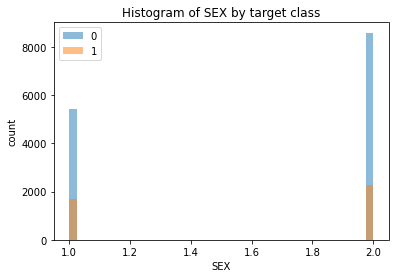

<Figure size 576x432 with 0 Axes>

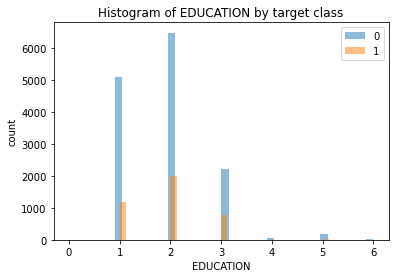

<Figure size 576x432 with 0 Axes>

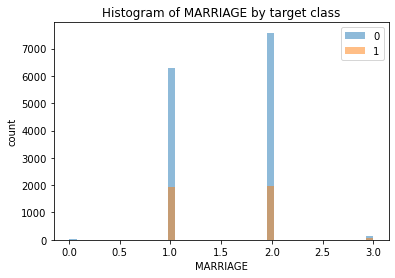

<Figure size 576x432 with 0 Axes>

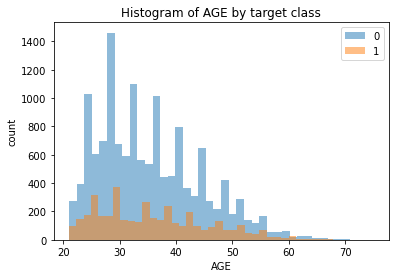

<Figure size 576x432 with 0 Axes>

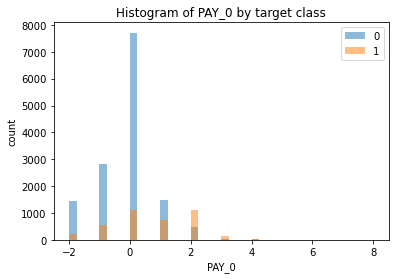

<Figure size 576x432 with 0 Axes>

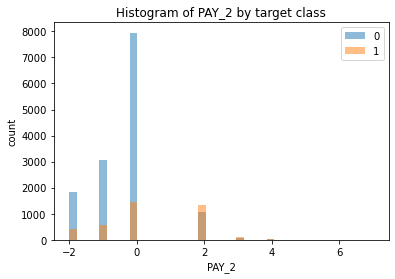

<Figure size 576x432 with 0 Axes>

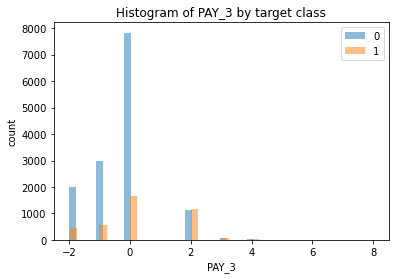

<Figure size 576x432 with 0 Axes>

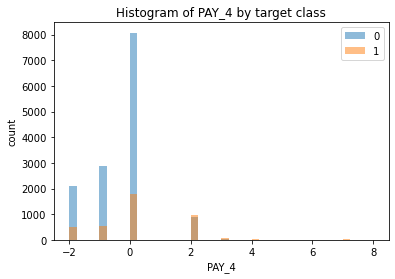

<Figure size 576x432 with 0 Axes>

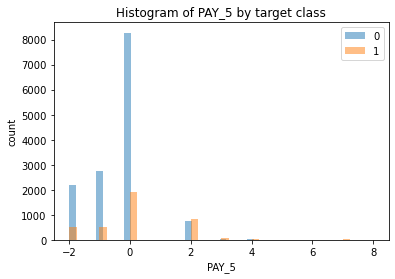

<Figure size 576x432 with 0 Axes>

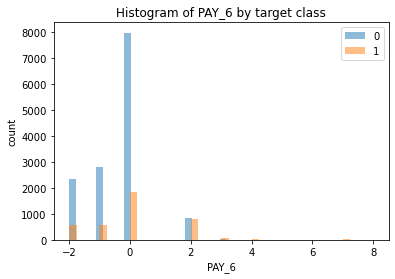

<Figure size 576x432 with 0 Axes>

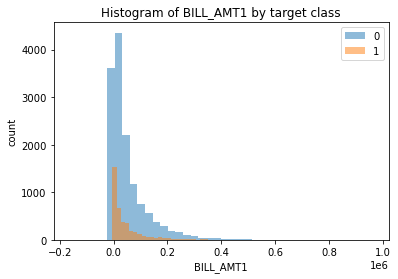

<Figure size 576x432 with 0 Axes>

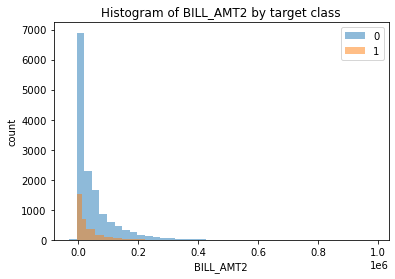

<Figure size 576x432 with 0 Axes>

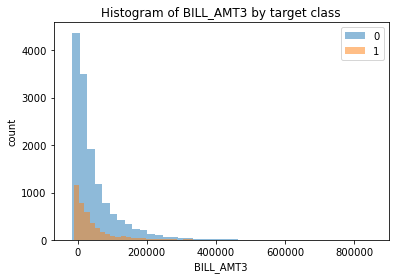

<Figure size 576x432 with 0 Axes>

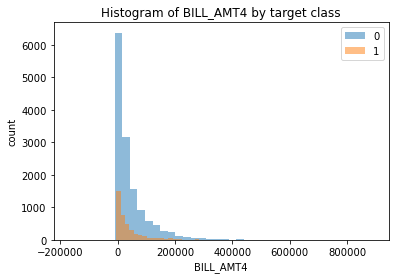

<Figure size 576x432 with 0 Axes>

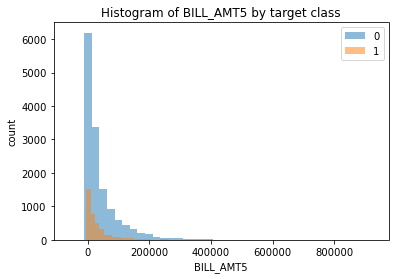

<Figure size 576x432 with 0 Axes>

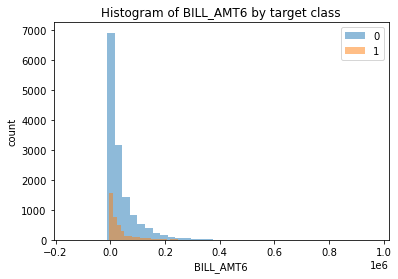

<Figure size 576x432 with 0 Axes>

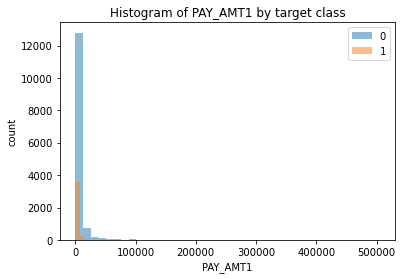

<Figure size 576x432 with 0 Axes>

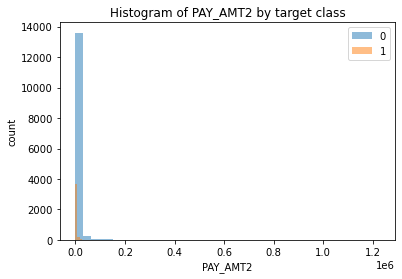

<Figure size 576x432 with 0 Axes>

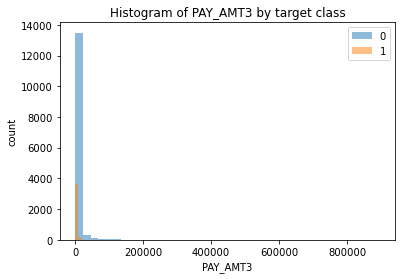

<Figure size 576x432 with 0 Axes>

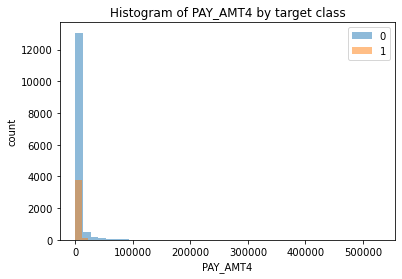

<Figure size 576x432 with 0 Axes>

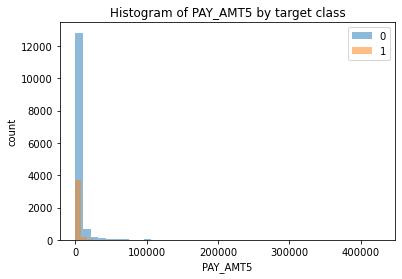

<Figure size 576x432 with 0 Axes>

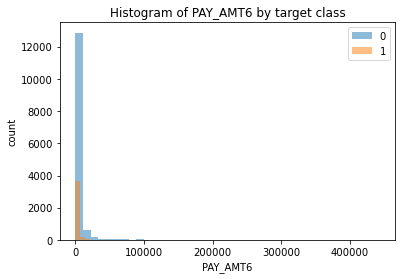

<Figure size 576x432 with 0 Axes>

Plotting all the histograms can give a more straight forward visual of the relationship between each feature and the target variable.


In [7]:
pd.set_option('display.max_columns', None)
# visualizations
negative_examples = train_df[train_df["default.payment.next.month"] == 0] 
positive_examples = train_df[train_df["default.payment.next.month"] == 1] 

negative_examples = negative_examples.drop(columns = ["default.payment.next.month"])
positive_examples = positive_examples.drop(columns = ["default.payment.next.month"])

# code adapted from hw2
for column in negative_examples:
    plt.hist(negative_examples[column], bins = 40, alpha = 0.5, label = "0")
    plt.hist(positive_examples[column], bins = 40, alpha = 0.5, label = "1")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.title("Histogram of " + column + " by target class")
    plt.legend()
    plt.figure(figsize=(8,6))
    plt.show() 

print("Plotting all the histograms can give a more straight forward visual of the relationship between each feature and the target variable.")

This plot is a heatmap that visualizes the correlation between all columns, showing which columns will likely influence the target variable more. Ranging from -1 to 1.


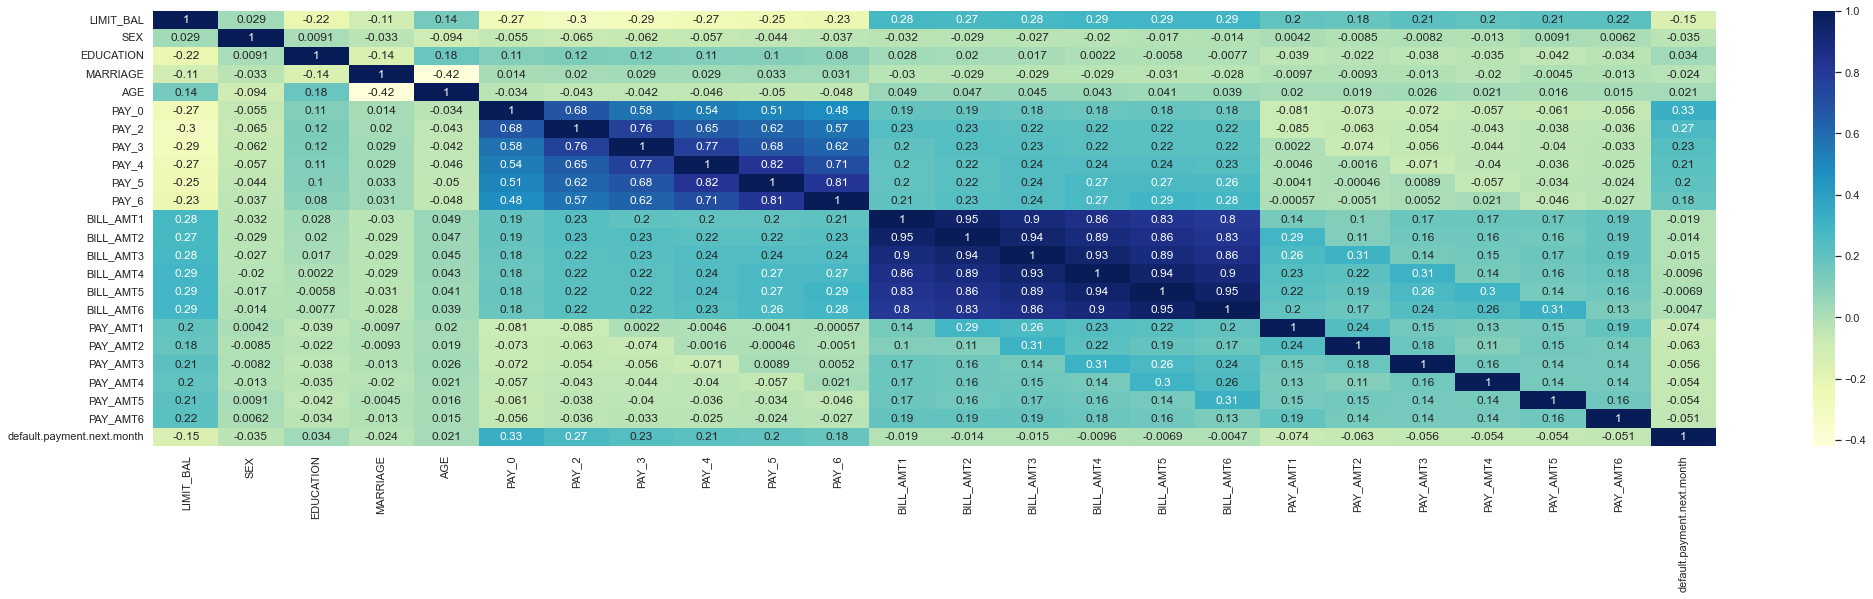

In [8]:
sns.set(rc = {'figure.figsize':(35,8)})
dataplot = sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
print("This plot is a heatmap that visualizes the correlation between all columns, showing which columns will likely influence the target variable more. Ranging from -1 to 1.")

From the above summary statistics, we can see that all columns are numeric values, and there is no NaN values in any row. We can also observe that there is a slight imbalance in the target class, but this can be revolved by having class_weight set to "balanced" later when fitting the model. From the histogram, we can see that PAY_0 to PAY_6 seems to be most relevant in predicting the target class. The heatmap shows the correlations between the columns, with a larger absolute value meaning more correlation between the two columns. Focusing specifically on the target column, PAY_0 to PAY_6 again are the most correlated to the target column.  

For metrics I would choose to use accuracy, and set class_weight to "balanced" when training the models. 

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [9]:
#convert dataframe to int, because it should be all int, but under scientific notation, it may be consider as float 
train_df = train_df.astype(int)
test_df  = test_df.astype(int)

#treat unexpecteded value (different from what default on kaggle should be) as non value
zero_missing_value = ["EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
negative_two_missing_value = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
train_df[zero_missing_value] = train_df[zero_missing_value].replace(0, np.nan)
test_df[zero_missing_value] = test_df[zero_missing_value].replace(0, np.nan)
train_df[negative_two_missing_value] = train_df[negative_two_missing_value].replace(-2, np.nan)
test_df[negative_two_missing_value] = test_df[negative_two_missing_value].replace(-2, np.nan)

#split X and y
X_train, y_train = train_df.drop(columns = ["default.payment.next.month"]), train_df["default.payment.next.month"]
X_test, y_test = test_df.drop(columns=["default.payment.next.month"]), test_df["default.payment.next.month"]


In [10]:
oridinal_feats = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
numeric_feats = list(set(X_train.columns) - set(oridinal_feats))

In [11]:
ct = make_column_transformer(
    (make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'), StandardScaler()),
        numeric_feats),
    (SimpleImputer(missing_values=np.nan, strategy='median'), oridinal_feats)
    # TODO
)
X_transformed = ct.fit_transform(X_train)

In [12]:
column_names = (
    numeric_feats
    + ct.named_transformers_["simpleimputer"].get_feature_names_out().tolist()
)
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)
X_transformed_df

,PAY_AMT1,BILL_AMT1,PAY_AMT4,BILL_AMT5,PAY_AMT2,LIMIT_BAL,PAY_AMT6,BILL_AMT3,PAY_AMT3,AGE,PAY_AMT5,BILL_AMT4,BILL_AMT2,BILL_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,-0.281274,-0.560440,-0.292786,-0.519895,-0.222862,-1.209408,-0.284354,-0.576068,-0.179413,0.814498,-0.288621,-0.541176,-0.539992,-0.501967,1.0,3.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.224989,-0.237044,-0.246105,-0.460001,-0.181838,-0.901794,-0.274986,-0.228817,-0.144749,-0.164873,-0.249641,-0.355471,-0.247329,-0.441773,2.0,2.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.098537,0.305558,0.022177,0.721696,-0.088835,0.482467,0.178291,0.458980,-0.007534,-0.926605,-0.047612,0.591900,0.378601,0.799618,2.0,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.250660,-0.480495,-0.313175,-0.394179,-0.182071,-1.132505,-0.184331,-0.416507,-0.067611,-1.253062,-0.211119,-0.365489,-0.450650,-0.390531,2.0,1.0,2.0,1.0,-1.0,-1.0,-1.0,2.0,-1.0
4,-0.042124,-0.572596,-0.313175,-0.660391,-0.275307,-0.901794,-0.305205,-0.683684,-0.138861,-1.361881,-0.309223,-0.627529,-0.618424,-0.647849,2.0,3.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.352075,1.738755,-0.246105,-0.574522,-0.182071,0.021047,1.911563,-0.381056,-0.239670,0.488041,-0.309223,-0.366769,-0.106065,-0.647849,2.0,3.0,1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0
17996,-0.352075,-0.633848,-0.313175,-0.660391,-0.275307,1.251502,-0.305205,-0.683611,-0.307917,0.596860,-0.309223,-0.671361,-0.687014,-0.647849,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17997,-0.243877,-0.018907,-0.265890,-0.331296,-0.213725,-0.901794,-0.252383,-0.163314,-0.266644,-1.470700,-0.256181,-0.362743,-0.088439,-0.315474,1.0,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17998,-0.099614,-0.581516,-0.220752,-0.637636,0.044167,-0.671084,-0.159068,-0.583126,-0.204645,-0.056054,0.995037,-0.644537,-0.631024,-0.312921,1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [13]:
#since baseline model does not depend on the features, it can directly use the not transformed version of the dataset
model = DummyClassifier(strategy="most_frequent")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7768333333333334

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [14]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(ct, LogisticRegression(max_iter = 1000))
# print(pipe_lr.get_params().keys())

parameters_C = [0.001, 0.01, 0.1, 1.0, 10, 100]
for para_C in parameters_C:
    pipe_lr = make_pipeline(ct, LogisticRegression(max_iter = 1000, C = para_C, class_weight = "balanced"))
    #TODO!!! class_weight = balanced
    pipe_lr.fit(X_train, y_train)
    scores = cross_validate(pipe_lr, X_train, y_train)
    accuracy_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    print("When hyperparameter C is", para_C,",Validation scores(accuracy scores) is", accuracy_scores["test_score"], "with standard deviation is", std_scores["test_score"])

When hyperparameter C is 0.001 ,Validation scores(accuracy scores) is 0.7758888888888889 with standard deviation is 0.005005398320381617
When hyperparameter C is 0.01 ,Validation scores(accuracy scores) is 0.7723888888888888 with standard deviation is 0.007009693464705559
When hyperparameter C is 0.1 ,Validation scores(accuracy scores) is 0.7696111111111111 with standard deviation is 0.006884743376337616
When hyperparameter C is 1.0 ,Validation scores(accuracy scores) is 0.7690555555555556 with standard deviation is 0.006621956556938082
When hyperparameter C is 10 ,Validation scores(accuracy scores) is 0.769 with standard deviation is 0.006653923005116947
When hyperparameter C is 100 ,Validation scores(accuracy scores) is 0.769 with standard deviation is 0.006653923005116947


Having different values of C does not seem to change the cross-validation scores by a large amount, it only differs by 0.01 when changing C values form 0.001 to 100, and the standard deviation is small too, for all C values it is around 0.006. Therefore no matter what C you choose, logistic regression will perform with around 0.77 accuracy. 

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [15]:
#refer to lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [16]:
results = {}
scoring_metric = "accuracy"


1.Random forests

In [17]:
#refer to lecture 11
from sklearn.ensemble import RandomForestClassifier
pipe_rf = make_pipeline(
    ct, RandomForestClassifier(random_state=123, n_jobs=-1, class_weight = "balanced")
)
results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random forests,3.844 (+/- 1.180),0.055 (+/- 0.007),0.817 (+/- 0.005),0.999 (+/- 0.000)


For RandomForestClassifier with default hyperparameter it returns mean validation accuracy of 0.817, with standard deviation of 0.007, which is higher than logistic regression of 0.77.

2. k-Nearest Neighbours (k-NNs)

In [18]:
#refer to lecture 4
from sklearn.neighbors import KNeighborsClassifier
# pipe_knn = make_pipeline(ct, KNeighborsClassifier(n_neighbors=k))
results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

for k in param_grid["n_neighbors"]:
    pipe_knn = make_pipeline(ct, KNeighborsClassifier(n_neighbors=k))
    scores = cross_validate(pipe_knn, X_train, y_train, return_train_score=True)
    results_dict["n_neighbors"].append(k)

    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)

In [19]:
results_df = results_df.set_index("n_neighbors")
results_df

,mean_train_score,mean_cv_score,std_cv_score,std_train_score
n_neighbors,,,,
1,0.999181,0.730333,0.008116,0.000111
6,0.831625,0.800611,0.003546,0.001440
11,0.823972,0.802944,0.004816,0.001375
16,0.818597,0.805500,0.004879,0.001520
21,0.816875,0.806389,0.004691,0.001707
26,0.814125,0.805944,0.004134,0.000692
31,0.813014,0.805667,0.005607,0.000997
36,0.811625,0.806889,0.004579,0.001512
41,0.811486,0.806667,0.005679,0.001022


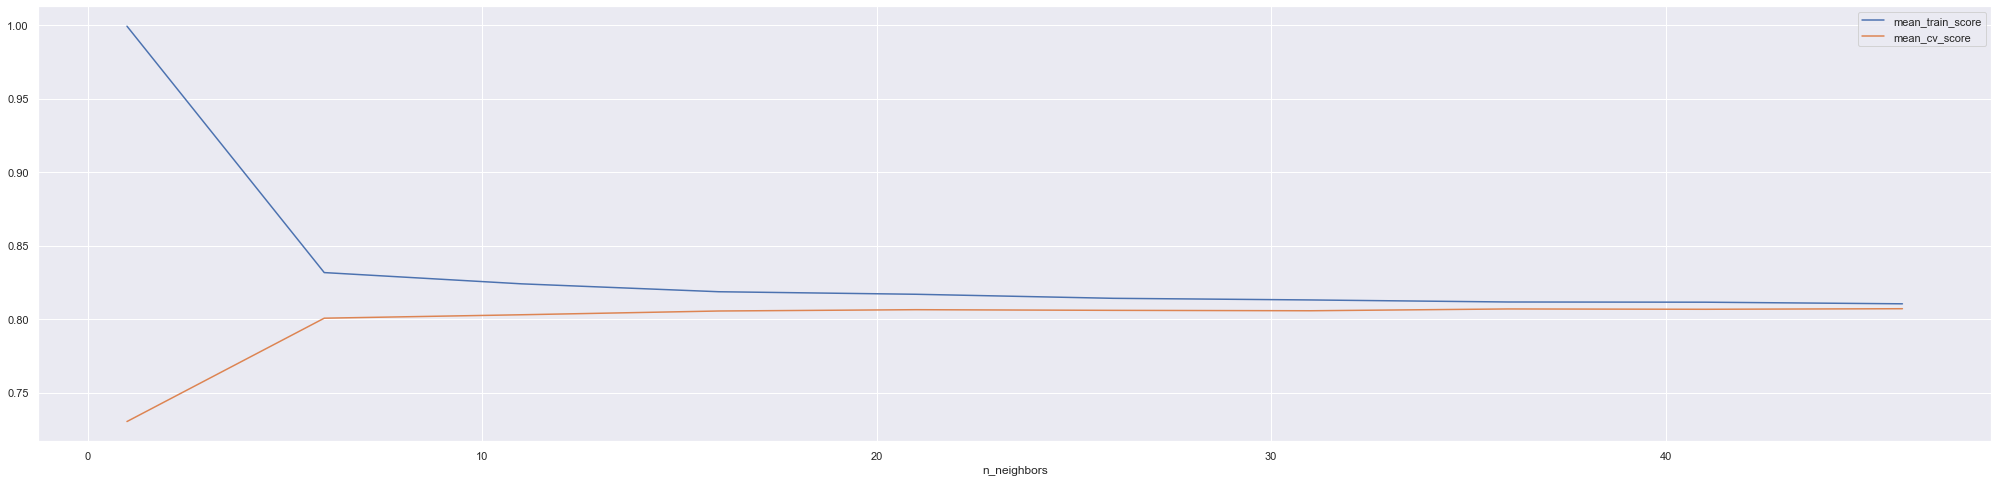

In [20]:
results_df[["mean_train_score", "mean_cv_score"]].plot();

In [21]:
best_n_neighbours = results_df.idxmax()["mean_cv_score"]
best_n_neighbours

46

For knn classifier with various hyperparameter k, the best mean validation accuracy is around 0.80, with standard deviation of 0.004-0.005, which is slightly higher than logistic regression of 0.77.

3. Support Vector Machines (SVMs) with RBF kernel

In [22]:
#refer to lecture 4

In [23]:
pipe_svm = make_pipeline(ct, SVC(kernel="rbf", class_weight = "balanced"))
scores = cross_validate(pipe_svm, X_train, y_train, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(scores["test_score"])))
pd.DataFrame(scores)

Mean validation score 0.780


,fit_time,score_time,test_score,train_score
0,11.139591,3.631612,0.770833,0.786944
1,11.252918,4.118077,0.786111,0.787847
2,11.843514,3.791494,0.774722,0.788542
3,10.913396,3.671507,0.780000,0.787014
4,11.153181,3.712990,0.786667,0.782014


For Support Vector Machines (SVMs) with RBF kernel with default hyperparameter it returns mean validation accuracy of 0.78, which is also higher than logistic regression of 0.77.

Overall, all three models I choose can beat logistic regression with a higher validation accuracy, and SVMs performed the best.

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

From all three models I've tried, even though SVMs have a higher validation accuracy, there was no result after running hyperparamter optimization for 40 minutes. At the same time, the difference in validation accuracy between SVMs and RandomForestClassifier is not significant. Therefore I will use RandomForestClassifier to perform hyperparameter optimizition.

In [24]:
#refer to lecture 8
# parameters = {'svc__gamma': [0.01, 0.1, 1.0, 10.0], 
#               'svc__C': [1.0, 100.0, 1000.0]}

# grid = GridSearchCV(pipe_svm, 
#                     param_grid = parameters, 
#                     cv = 5,
#                     scoring= "accuracy",
#                     return_train_score = True)
# grid.fit(X_train, y_train)
# grid.best_params_

We attempted to use the above model, yet it took an unreasonable amount of time to run, so we decided to use the following instead. 

In [25]:
#refer to lecture 11
pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=123, n_jobs=-1, class_weight = "balanced"))
# print(pipe_rf.get_params().keys())
parameters = {'randomforestclassifier__n_estimators': [1, 10, 50, 200, 1000], 
              'randomforestclassifier__max_depth': [5, 10, 15]}
grid = GridSearchCV(pipe_rf, 
                    param_grid = parameters, 
                    cv = 5,
                    scoring= "accuracy",
                    return_train_score = True)
grid.fit(X_train, y_train)
grid.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 1000}

In [26]:
pipe_rf_best = make_pipeline(ct, RandomForestClassifier(random_state=123, n_jobs=-1, n_estimators = 1000, max_depth = 15, class_weight = "balanced"))
mean_std_cross_val_scores(pipe_rf_best, X_train, y_train, return_train_score=True, scoring=scoring_metric)

fit_time       30.716 (+/- 1.051)
score_time      0.344 (+/- 0.087)
test_score      0.808 (+/- 0.008)
train_score     0.932 (+/- 0.003)
dtype: object

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [27]:
import eli5
pipe_rf_best.fit(X_train, y_train)
eli5_rf = eli5.explain_weights(
    pipe_rf_best.named_steps["randomforestclassifier"], feature_names=column_names
)
eli5_rf

Weight,Feature
0.1267 ± 0.1104,PAY_0
0.0666 ± 0.1221,PAY_2
0.0585 ± 0.0378,PAY_AMT1
0.0583 ± 0.0190,BILL_AMT1
0.0529 ± 0.0243,LIMIT_BAL
0.0501 ± 0.0180,BILL_AMT2
0.0494 ± 0.0259,PAY_AMT2
0.0463 ± 0.0231,PAY_AMT3
0.0460 ± 0.0155,BILL_AMT3
0.0446 ± 0.0155,BILL_AMT5


Based on the feature importances ranking, it matches with the histograms from question 3.  Where PAY_0 and PAY_2 does play a significant role in predicting the target class.

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [28]:
pipe_rf_best.fit(X_train, y_train)
pipe_rf_best.score(X_test, y_test)

0.80225

The test scores are not significantly different from the validation scores from before. However, since our dummy classifier returned accuracy of 0.77, the test score of 0.80225 , does not seems to be completely reliable. 
We could have optimization bias, as our estimators is 1000 and max depth is 15.

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

The final accuracy score obtained on the test set is around 0.78, which is not a horrible accuracy score. However it is only slightly higher than the 0.77 obtained on the DummyClassifier, which makes me slightly doubt the reliability of this model. Maybe attempting other model or metric will yield more reliable results, such as using recall as metric or using logistic regression as model.  

This mini-project was complete in a slight rush due to the SVMs taking forever to run, and the last minute switch to the RandomForestClassifier. However I think it is a good exercise to start from scratch and have flexibility in model and metrics.

For future improvements I would maybe try using the SVMs or knn model and use a higher train test split. Due to time and capability of the laptop, we used 60/40 train test split and RandomForestClassifier, as SVMs hyperparameter optimization was running for 40 minutes without returning an result. This may attribute to the lower than expected score obtained on our final model, since RandomForestClassifier is usually a model that does not require heavy tuning of hyperparameters to obtain results

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 